
<h1 style="text-align:center">Neural Network Assignment</h1>




<h4 style = "text-align:right"> - Aryan Gupta
</h4>

In [51]:
# importing packages

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparameters
input_size = 28*28 #784
hidden_size = 100
num_of_classes = 10
num_epochs = 4
batch_size = 50
learning_rate =0.001


In [38]:
# Distorted MNIST Dataset
# train data loader
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class DistortedMNIST(Dataset):
  def __init__(self):
    # data loading
    xy = np.loadtxt("/content/train.csv", delimiter=",", dtype = np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:,1:]).view(-1, 1, 28,28)
    self.y = torch.from_numpy(xy[:,0]) # n_samples,1
    self.num_of_samples = xy.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]
  def __len__(self):
    # len(dataset) 
    return self.num_of_samples

train_datasets = DistortedMNIST()

# test dataset formulation class
class DistortedMNIST_test(Dataset):
  # implement init with self
  def __init__(self):
    # data loading
    x = np.loadtxt("/content/test.csv", delimiter=",", dtype = np.float32, skiprows=1)
    self.x = torch.from_numpy(x).view(-1, 1, 28,28)
    self.num_of_samples = x.shape[0]
  def __len__(self):
    # len(dataset) 
    return self.num_of_samples



In [39]:
train_datasets = DistortedMNIST()
test_datasets = DistortedMNIST_test()

In [58]:
print(train_datasets.__len__())

40858


In [53]:
train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_datasets, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


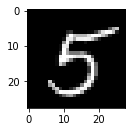

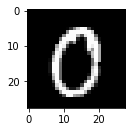

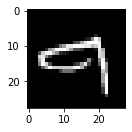

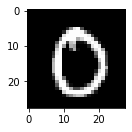

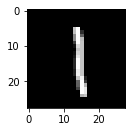

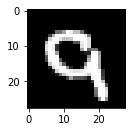

In [42]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap="gray")
  plt.show()

In [54]:
# defining the neural network
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
model = NeuralNetwork(input_size, hidden_size, num_of_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# training loops
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.long().to(device)

    # forward
    output = model(images)
    loss = criterion(output, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f"epoch {epoch+1}/{num_epochs} , step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")


epoch 1/4 , step 100/818, loss = 0.5679
epoch 1/4 , step 200/818, loss = 0.7050
epoch 1/4 , step 300/818, loss = 0.5353
epoch 1/4 , step 400/818, loss = 0.1722
epoch 1/4 , step 500/818, loss = 0.1355
epoch 1/4 , step 600/818, loss = 0.2547
epoch 1/4 , step 700/818, loss = 0.2041
epoch 1/4 , step 800/818, loss = 0.1565
epoch 2/4 , step 100/818, loss = 0.1446
epoch 2/4 , step 200/818, loss = 0.3903
epoch 2/4 , step 300/818, loss = 0.1453
epoch 2/4 , step 400/818, loss = 0.0833
epoch 2/4 , step 500/818, loss = 0.1303
epoch 2/4 , step 600/818, loss = 0.2306
epoch 2/4 , step 700/818, loss = 0.0450
epoch 2/4 , step 800/818, loss = 0.1686
epoch 3/4 , step 100/818, loss = 0.0374
epoch 3/4 , step 200/818, loss = 0.2180
epoch 3/4 , step 300/818, loss = 0.4096
epoch 3/4 , step 400/818, loss = 0.1889
epoch 3/4 , step 500/818, loss = 0.1230
epoch 3/4 , step 600/818, loss = 0.1295
epoch 3/4 , step 700/818, loss = 0.0608
epoch 3/4 , step 800/818, loss = 0.1660
epoch 4/4 , step 100/818, loss = 0.2799


In [55]:
# training acuracy on one sample
examples = iter(train_loader)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for i,(images, labels) in enumerate(examples):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    a, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions==labels).sum().item()
  train_accuracy = 100.0 *(n_correct/ n_samples)
  print(f"Training accuracy on a sample: {train_accuracy}")

Training accuracy on a sample: 96.3948308776739
